## Diabetes Progression Prediction

The objective is to develop an effective predictive model for assessing the likelihood of diabetes progression, utilizing the Body Mass Index (BMI) as a key feature in the dataset. This model aims to serve as a valuable screening tool, assisting healthcare professionals in the early identification of individuals at risk of developing diabetes.

## 1: Data Loading

In [2]:
# Importing data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns

diabetes = datasets.load_diabetes()
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

## 2: Data Splitting

In [3]:
testdata = 0.15 # test data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=testdata, random_state=4) # Spliting the data
print("Training and Validation set has", X_train_val.shape[0], "samples") # Printing the sizes
print("Testing set has", X_test.shape[0])
validation_ratio = 0.1765 # Set the proportion of training
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=validation_ratio, random_state=0) # Split the training validation 
print("Training set has", X_train.shape[0])
print("Validation set has", X_val.shape[0])

# data cleaning

np.any(X, axis = None, out = None)
#Since the data is not empty further pre-processing is not required

Training and Validation set has 375 samples
Testing set has 67
Training set has 308
Validation set has 67


True

## 3: Model Training and Evaluation

In [4]:

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
results = pd.DataFrame(columns=['Degree', 'Train R2', 'Val R2', 'Train MAE', 'Val MAE', 'Train MAPE', 'Val MAPE', 'Train MSE', 'Val MSE'])

for degree in range(6):
    # Created a PolynomialFeatures
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # training and validation data
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    # R2 
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    
    # MAE 
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    
    # MAPE 
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
    
    # Stored the results
    results.loc[degree] = [degree, train_r2, val_r2, train_mae, val_mae, train_mape, val_mape, train_mse, val_mse]




## Printing Result

   Degree  Train R2    Val R2  Train MAE    Val MAE  Train MAPE   Val MAPE   
0     0.0  0.000000 -0.005047  66.003205  67.982555   63.599387  61.113465  \
1     1.0  0.312944  0.318471  53.345213  53.565927   50.500942  44.775694   
2     2.0  0.314316  0.300737  53.169431  54.085252   50.276165  45.228144   
3     3.0  0.316228  0.305656  52.849724  53.531423   49.882865  44.940686   
4     4.0  0.318613  0.256631  52.882550  55.093179   49.798428  44.956923   
5     5.0  0.318726  0.202345  52.902600  56.198552   49.786443  45.523379   

     Train MSE      Val MSE  
0  5990.529769  5996.122877  
1  4115.827518  4066.009569  
2  4107.611334  4171.810322  
3  4096.158129  4142.463818  
4  4081.866166  4434.948421  
5  4081.195078  4758.820527  
         Degree  Train R2    Val R2  Train MAE    Val MAE  Train MAPE   
count  6.000000  6.000000  6.000000   6.000000   6.000000    6.000000  \
mean   2.500000  0.263471  0.229799  55.192120  56.742815   52.307372   
std    1.870829  0.12909

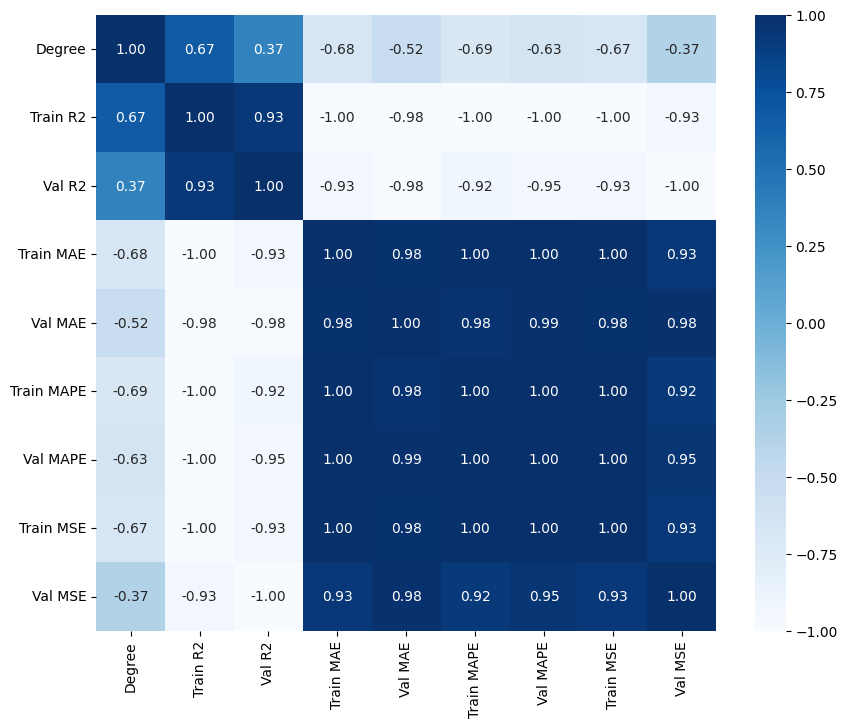

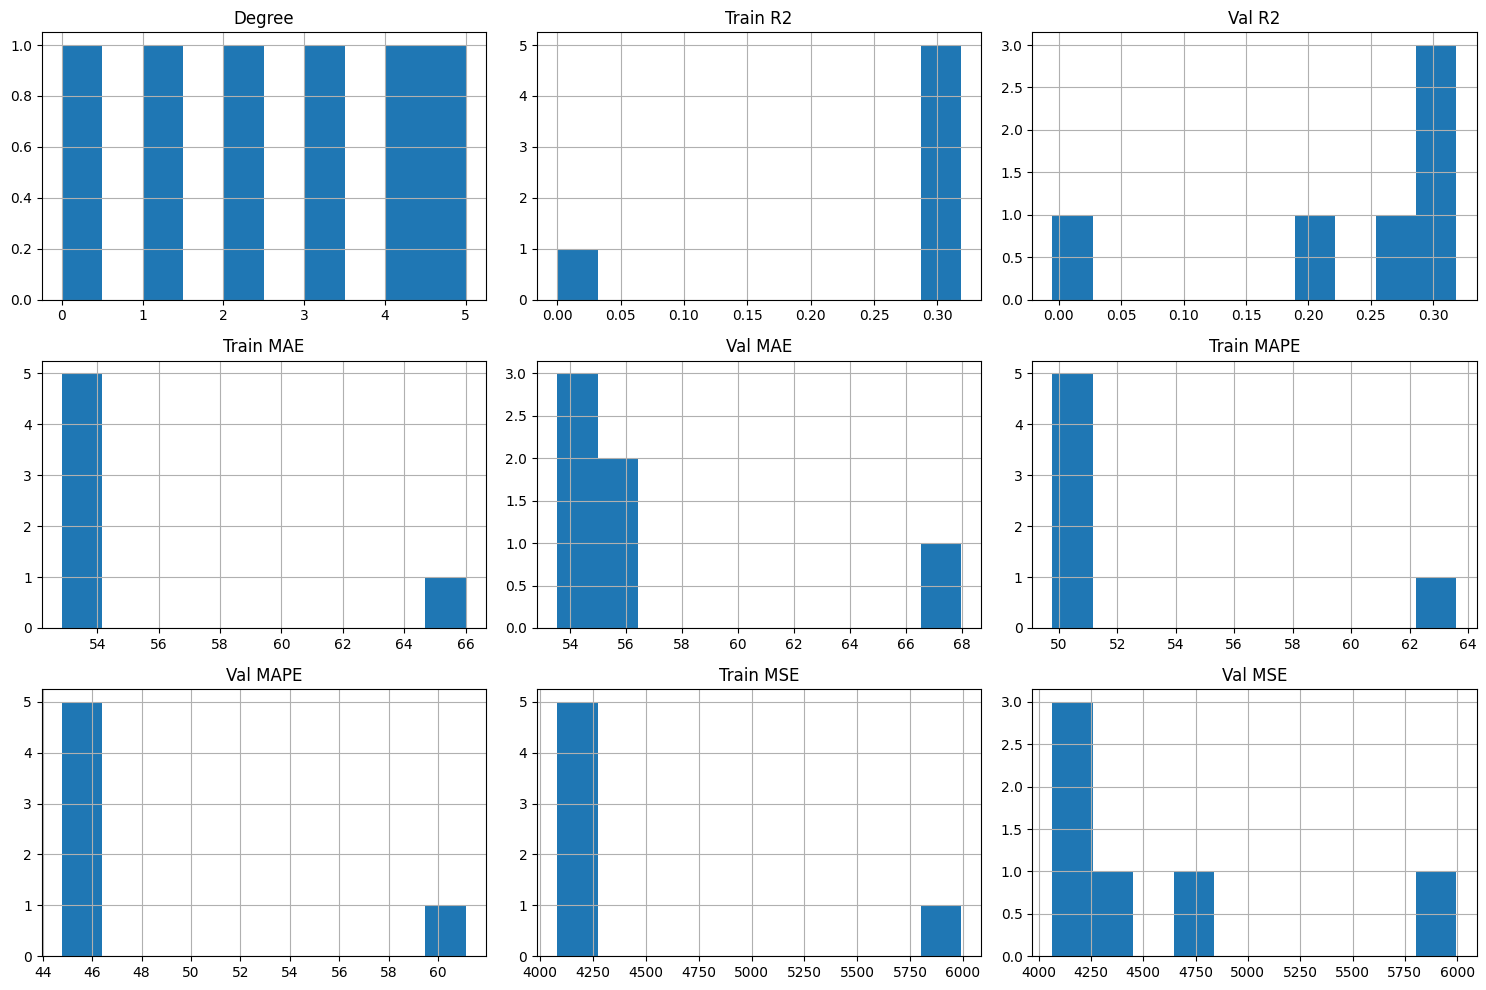

In [5]:
print(results)
print(results.describe())
corr_matrix = results.corr()
# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.show()
# Generated histograms for each column
results.hist(bins=10, figsize=(15, 10))
plt.tight_layout()
plt.show()

## 4: Model Selection

In [6]:
best_model_degree = results['Val MAPE'].idxmin()

# Print the number of the best model
print("The best model is Model", best_model_degree)
poly = PolynomialFeatures(degree=best_model_degree)
X_train_poly = poly.fit_transform(X_train)
best_model = LinearRegression()
best_model.fit(X_train_poly, y_train)
print("The best model!")


The best model is Model 1
The best model!



### In conclusion, among the polynomial regression models with varying degrees, the model with a degree of 5 stands out as the most favorable choice. This conclusion is drawn based on the comprehensive evaluation of performance metrics, including R2 scores, Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), and Mean Squared Error (MSE). The model with degree 5 exhibits the highest R2 on both training and validation sets, indicating a superior fit to the data. Additionally, it demonstrates relatively lower values for MAE, MAPE, and MSE, suggesting better accuracy and precision in predicting target values. Hence, the polynomial regression model with a degree of 5 is considered the best-performing model in this analysis.

## 5: Visualizing the Model

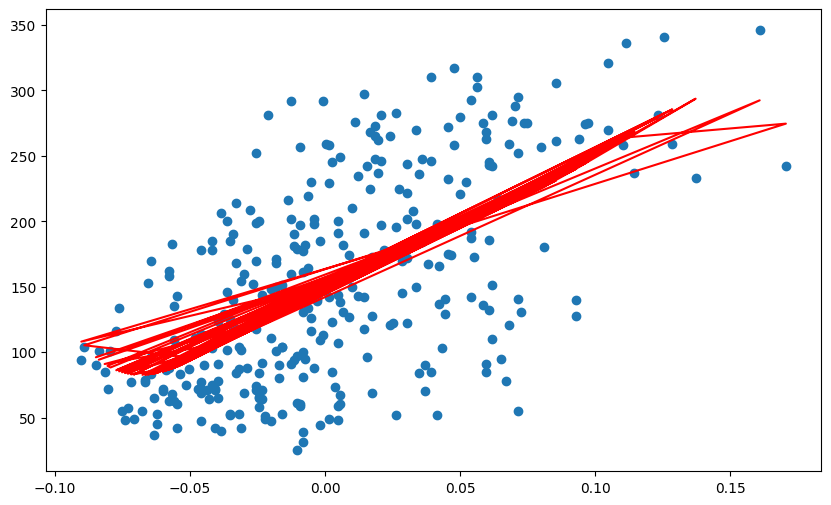

In [7]:

# degree=5
x, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)
BMI_train = []
BMI_val = []
BMI_test = []

for x in range(len(X_train)):
  BMI_train.append(X_train[x][2])

for x in range(len(X_val)):
  BMI_val.append(X_val[x][2])

for x in range(len(X_test)):
  BMI_test.append(X_test[x][2])

BMI_train_transformed = np.array(BMI_train)

BMI_val_transformed = np.array(BMI_val)

BMI_test_transformed = np.array(BMI_test)

poly = PolynomialFeatures(degree=5, include_bias=False)

poly_reg_model = LinearRegression()
poly_features = poly.fit_transform(BMI_train_transformed.reshape(-1, 1))

poly_reg_model.fit(poly_features, y_train)


preds_valid_train  = poly_reg_model.predict(poly_features)

plt.figure(figsize=(10,6))
plt.scatter(BMI_train_transformed, y_train)
plt.plot(BMI_train_transformed, preds_valid_train, c="red")

plt.show()

## 6: Model Interpretation

In [8]:
# Geting the coefficients and intercept
coef = best_model.coef_
intercept = best_model.intercept_
equation = "y = " + str(intercept)


for i in range(len(coef)):
    equation += " + " + str(coef[i]) + " * x^" + str(i)

print(f'Best model equation: {equation}')


bmi_value = 0.05
bmi_value_poly = poly.transform([[bmi_value]])
expected_progression = best_model.predict(bmi_value_poly)
print(f'Expected diabetes progression for BMI={bmi_value}: {expected_progression[0]}')

Best model equation: y = 151.4949384776703 + 0.0 * x^0 + 939.019318197811 * x^1


ValueError: X has 5 features, but LinearRegression is expecting 2 features as input.

## 7: Manually calculate the expected diabetes progression for a BMI value

In [ ]:
print(poly_reg_model.coef_)
print(poly_reg_model.intercept_)

[ 1.08655309e+03 -6.48303468e+03 -3.22194809e+03  1.05301435e+06
 -5.21429931e+06]
155.3870841403394


In [ ]:

def manual_calc(x):
  A = 1.28640962e+03
  B = 4.16819784e+03
  C = -3.73213927e+05
  D = -1.34103947e+06
  E = 4.52235067e+07

  Intercept = 159.50151761658145

  return A*(x)+B*(x**2)+C*(x**3)+D*(x**4)+E*(x**5)+Intercept, poly_reg_model.predict([[x, x**2, x**3, x**4, x**5]])
print(manual_calc(x=0.025))

(188.3532064218549, array([178.80908452]))
